<a href="https://colab.research.google.com/github/komilkiway/BjSolvedCode/blob/main/dca_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 레이블을 출력하기 위해 한글 폰트를 다운 받는 시도함 -> 해결x
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import requests
import pandas as pd

#경기도 물향기 수목원 이용 현황
url = "https://openapi.gg.go.kr/WtrArbrtmEntrncStus?&pindex=10&type=json&pSize=250&KEY=28fe7cf071e84cb9beece2d73f5b3a93"
r = requests.get(url)
data = r.json()

#경기도 미세먼지 일일 데이터
url2 = "https://openapi.gg.go.kr/FinedustAlarmInqServc?&pindex=1&type=json&KEY=7c97f8a77b8047babc6ace6e9de80daf"

r2 = requests.get(url2)
data2 = r2.json()

In [ ]:
d_user = data['WtrArbrtmEntrncStus'][1]['row']
data['WtrArbrtmEntrncStus'][1]['row']

In [ ]:
d_user_df = pd.DataFrame(d_user) # 데이터 판다스 데이터 프레임으로 시각화
# 불필요 컬럼 삭제
arboretum_enter_df_v1= d_user_df.drop(['WDAY', 'DAY_PARKNG_PAYCHRG_FREECHG_CNT','PAYCHRG_PARKNG_CNT',
                                       'PAYCHRG_PARKNG_CNT', 'FREECHG_PARKNG_CNT','DAY_AUDENC_ANULREVN_AMT',
                                        'DAY_PARKNG_ANULREVN_AMT', 'RM'], axis=1)
arboretum_enter_df_v1

# 열이름 변경
arboretum_enter_df_v2 = arboretum_enter_df_v1.rename(
    columns={'DE': '날짜', 'WETHER_INFO': '날씨', 
    'DAY_AUDENC_PAYCHRG_FREECHG_CNT': '일일입장객수', 
    'PAYCHRG_AUDENC_CNT' : '유료입장객수',
    'FREECHG_AUDENC_CNT': '무료입장객수', 
    'DAY_TOT_ANULREVN_AMT': '일일세입'
})
arboretum_enter_df_v2


In [ ]:
d_dust = data2['FinedustAlarmInqServc'][1]['row']
data2['FinedustAlarmInqServc'][1]['row']

In [ ]:
d_dust_df = pd.DataFrame(d_dust)
d_dust_df

In [ ]:
# 불필요 컬럼 삭제
sp_d_dust_df= d_dust_df.drop(['REGION_NM', 'APPOINT_DE', 'APPOINT_TM',
                              'RELEASE_DE', 'RELEASE_TM', 'RELEASE_DNST'], axis=1)
# 남부권의 데이터만 가져옴
sp_d_dust_df = sp_d_dust_df[sp_d_dust_df['DISTRCT_NM']=='남부권']

# 열이름 변경
dust_df_v1 =  sp_d_dust_df.rename(
    columns={'STD_DE': '날짜', 'DISTRCT_NM' : '권역멍',
             'ITEM_NM': '항목명', 'APPOINT_DNST': '발령농도'
    }
)
dust_df_v1

In [ ]:
# merge 활용
user_dust_df = pd.merge(arboretum_enter_df_v2, dust_df_v1, on='날짜', how='outer')
user_dust_df

,날짜,날씨,일일입장객수,유료입장객수,무료입장객수,일일세입,권역멍,항목명,ALARM_STEP_NM,발령농도
0,2019-09-09,None,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2019-09-10,흐림/비,136.0,47.0,89.0,129000.0,NaN,NaN,NaN,NaN
2,2019-09-11,흐림,103.0,87.0,16.0,228000.0,NaN,NaN,NaN,NaN
3,2019-09-12,흐림/비,616.0,473.0,143.0,1102400.0,NaN,NaN,NaN,NaN
4,2019-09-13,맑음,2954.0,2154.0,800.0,4976100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
267,2020-10-22,NaN,NaN,NaN,NaN,NaN,남부권,PM10,주의보,162.0
268,2020-05-11,NaN,NaN,NaN,NaN,NaN,남부권,PM10,주의보,156.0
269,2020-03-09,NaN,NaN,NaN,NaN,NaN,남부권,PM25,주의보,76.0
270,2020-02-22,NaN,NaN,NaN,NaN,NaN,남부권,PM10,주의보,159.0


In [ ]:
user_dust_df.to_csv("m_df_user_dust.csv")

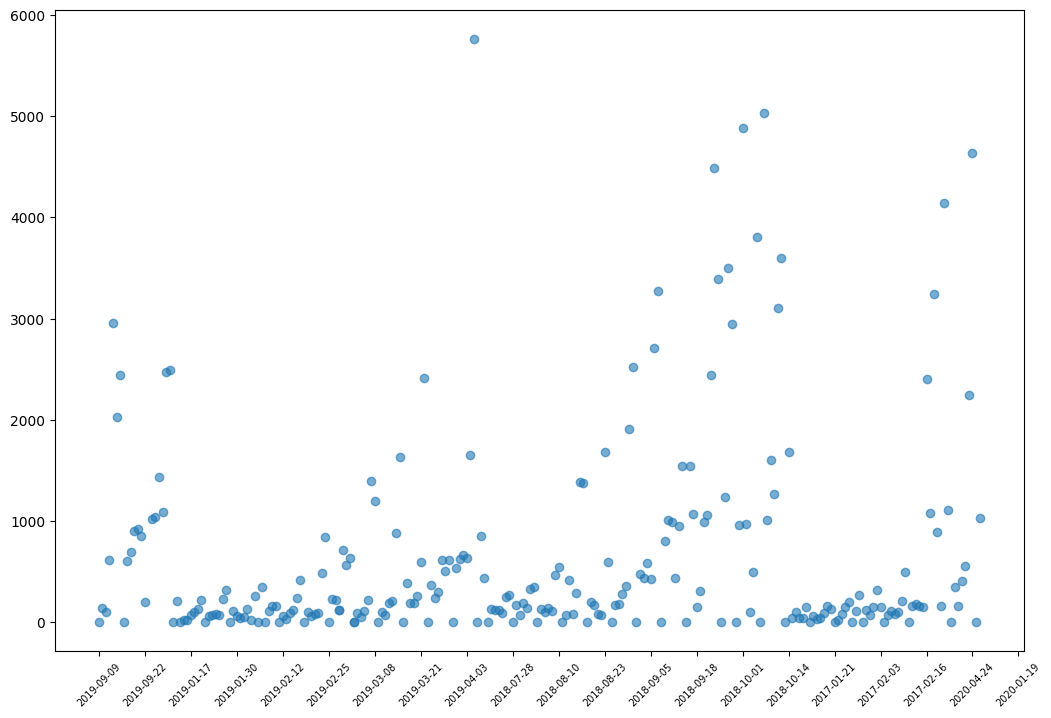

In [ ]:
# 산점도 그리기

#필요 패키지 import
import matplotlib.pyplot as plt 
from matplotlib import font_manager

# 그래프 크기 변경
plt.figure(figsize=(900/72, 600/72))

plt.scatter(user_dust_df['날짜'], user_dust_df['일일입장객수'], alpha=0.6)


# x축 데이터
x = user_dust_df['날짜']
step = len(x) // 20  # x축 레이블 개수를 10개로 설정

plt.xticks(range(0, len(x), step), x[::step], rotation=45,  fontsize=7)

plt.show()
# 2019년 9월 부터 2020년 2월 입장객 추이를 볼수있다

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

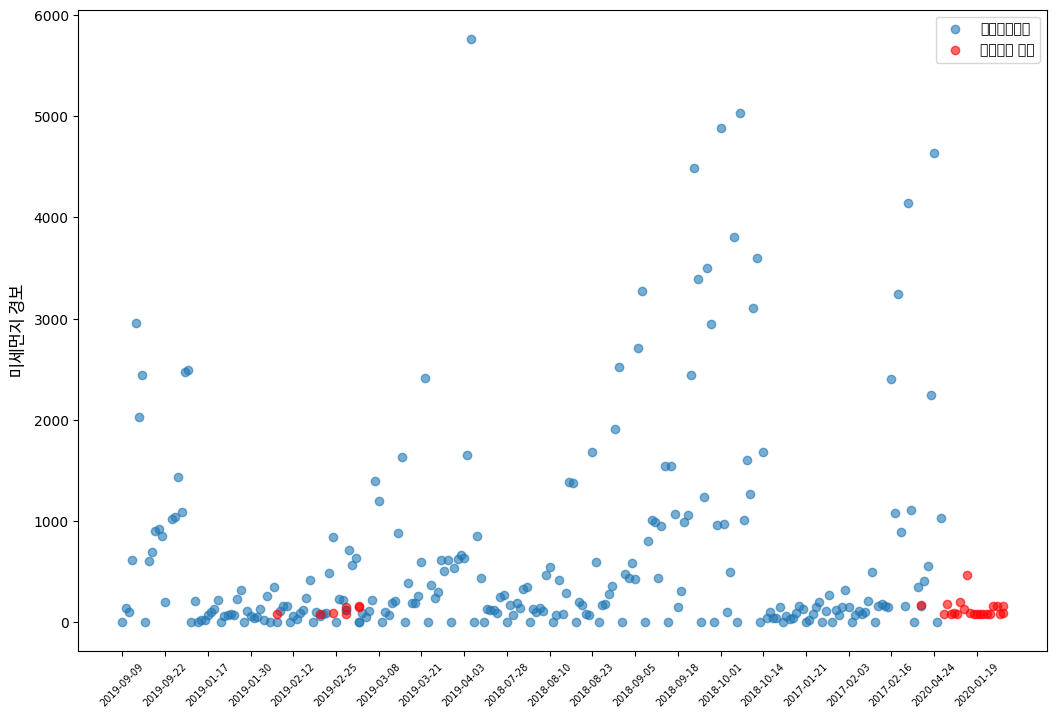

In [ ]:
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=12)

# 그래프 크기 변경
plt.figure(figsize=(900/72, 600/72))

# x축 데이터
x = user_dust_df['날짜']

# 첫번째 산점도 그리기
plt.scatter(x, user_dust_df['일일입장객수'], alpha=0.6, label="일일입장객수")

step = len(x) // 20  # x축 레이블 개수를 10개로 설정
plt.xticks(range(0, len(x), step), x[::step], rotation=45,  fontsize=7) # x 축 레이블 구간별 표시

# 두 번째 산점도 그리기 (미세먼지)
y2 = user_dust_df['발령농도']
plt.scatter(x, y2, alpha=0.6, color='red', label='미세먼지 경보')

# y축 레이블 설정
plt.ylabel('미세먼지 경보', fontproperties=fontprop)
# 범례 표시
plt.legend()

plt.show()
# 미세먼지 경보가 발생했을때 와 발생하지 않았을때 
# 입장객수를 현황을 파악할수있다